# Project: Insights from Stack Overflow Surveys (2021–2024)

## Business Understanding

This project focuses on answering some questions about trends, technologies development.

Question 1: What have been the major trends in technology usage across programming languages, databases, platforms, and tools over the past four years, and what emerging technologies are shaping the industry?

Question 2: How has the adoption of AI tools and practices evolved in development environments, and what do developers perceive about their effectiveness?

Question 3: Can we develop a recommendation model to predict programming language preferences based on individual developer choices and attributes? (answerd in file model.ipynb)

## Data understanding

### Gather data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import get_questions_by_name, calculate_unique_value_percentages

pd.options.mode.copy_on_write = True

In [2]:
# Load  and display the data
data_2021 = pd.read_csv('survey_results_public_2021.csv')
data_2022 = pd.read_csv('survey_results_public_2022.csv')
data_2023 = pd.read_csv('survey_results_public_2023.csv')
data_2024 = pd.read_csv('survey_results_public_2024.csv')

schema_2021 = pd.read_csv('survey_results_schema_2021.csv')
schema_2022 = pd.read_csv('survey_results_schema_2022.csv')
schema_2023 = pd.read_csv('survey_results_schema_2023.csv')
schema_2024 = pd.read_csv('survey_results_schema_2024.csv')

display(data_2024)
display(schema_2024)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR
...,...,...,...,...,...,...
82,QID337,JobSatPoints_7,"Learning and using new technology, including p...",NaN,MC,MAVR
83,QID337,JobSatPoints_8,"Designing and building environments, databases...",NaN,MC,MAVR
84,QID337,JobSatPoints_9,"Being a power user of a tool, developer langua...",NaN,MC,MAVR
85,QID337,JobSatPoints_10,Working with new and/or top-quality hardware,NaN,MC,MAVR


To understand the data we need to check que full question and the following loop uses the function "get_questions_by_name" explained in the functions.py file.

In [3]:
for x in schema_2021['qname']:    
    print(x)
    print(get_questions_by_name(schema_2021, x))
    print('-'*50)

S0
['<div><span style="font-size:19px;"><strong>Hello world! </strong></span></div>\n\n<div> </div>\n\n<div>Thank you for taking the 2021 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>\n\n<div> </div>\n\n<div>As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We\'ll call out each of those in the survey with a note saying "This information will be kept private." </div>\n\n<div> </div>\n\n<div>There are six sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.</div><div><br></div>\n\n<div>   1. Basic Information</div>\n\n<div>   2. Education, Work, and Career</div>\n\n<div>  

In [4]:
for x in schema_2022['qname']:    
    print(x)
    print(get_questions_by_name(schema_2022, x))
    print('-'*50)

S0
['<div><span style="font-size:19px;"><strong>Hello world! </strong></span></div>\n\n<div> </div>\n\n<div>Thank you for taking the 2022 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>\n\n<div> </div>\n\n<div>As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We\'ll call out each of those in the survey with a note saying "This information will be kept private." </div>\n\n<div> </div>\n\n<div>There are seven sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.</div><div><br></div>\n\n<div>   1. Basic Information</div>\n\n<div>   2. Education, Work, and Career</div>\n\n<div>

In [5]:
for x in schema_2023['qname']:    
    print(x)
    print(get_questions_by_name(schema_2023, x))
    print('-'*50)

S0
['<div><span style="font-size:19px;"><strong>Hello world! </strong></span></div>\n\n<div> </div>\n\n<div>Thank you for taking the 2023 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>\n\n<div> </div>\n\n<div>There are seven sections in this survey. The 2nd, 3rd, 4th and 5th sections will appear in a random order.</div><div><br></div>\n\n<div>   1. Basic Information</div>\n\n<div>   2. Education, Work, and Career</div>\n\n<div>   3. Technology and Tech Culture</div>\n\n<div>   4. Stack Overflow Usage + Community</div>\n\n<div>   5. Artificial Intelligence </div>\n\n<div>   6. Professional Developer Series (Optional)</div><div>   7. Final Questions</div>\n\n<div> \n<div>Most questions in this survey are optional. Required questions are marked with *. This anonymous survey will take about 15 minutes to complete. We encourage you to complete it in one sitting.</div><div><br></div>\n</div>\n\n<div><strong>If 

In [6]:
for x in schema_2024['qname']:    
    print(x)
    print(get_questions_by_name(schema_2024, x))
    print('-'*50)

MainBranch
['Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".*']
--------------------------------------------------
Age
['What is your age?*']
--------------------------------------------------
Employment
['Which of the following best describes your current employment status? Select all that apply.*']
--------------------------------------------------
RemoteWork
['Which best describes your current work situation?']
--------------------------------------------------
Check
['Just checking to make sure you are paying attention to the survey questions. Select ‘Apples’ from the list and you can get back to the survey.*<br><br>']
--------------------------------------------------
CodingActivities
['Which of the following best describes the code you write outside of work? Select all that apply.']
--------------------------------------------------
EdLevel
['Which of the following best describes the highest level 

## Q1: What have been the major trends in technology usage across programming languages, databases, platforms, and tools over the past four years, and what emerging technologies are shaping the industry?

## Data preparetion

### Clean the data

In [7]:
# Collumns of interest for question 1
cols_to_analyze = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith", 
    "PlatformHaveWorkedWith", 
    "WebframeHaveWorkedWith", 
    'MiscTechHaveWorkedWith',
    'ToolsTechHaveWorkedWith'
]

# New dataframe with only collumns of interest
tech_data_2021 = data_2021[cols_to_analyze]
tech_data_2022 = data_2022[cols_to_analyze]
tech_data_2023 = data_2023[cols_to_analyze]
tech_data_2024 = data_2024[cols_to_analyze]

#Dictionare of df
df_to_analyze = {
    '2021':tech_data_2021,
    '2022':tech_data_2022,
    '2023':tech_data_2023,
    '2024':tech_data_2024
}

display(tech_data_2024)


,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack
2,C#,Firebase Realtime Database,Google Cloud,ASP.NET CORE,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,MSBuild
3,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,NumPy;Pandas;Ruff;TensorFlow,Docker;npm;Pip
4,C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,NaN,APT;Make;npm
...,...,...,...,...,...,...
65432,NaN,NaN,NaN,NaN,NaN,NaN
65433,NaN,NaN,NaN,NaN,NaN,NaN
65434,NaN,NaN,NaN,NaN,NaN,NaN
65435,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,PostgreSQL;SQLite,NaN,Angular;Node.js;React,GTK;OpenGL,Ansible;APT;Docker;Make;npm;Pip;Podman


Since there is more than one answer per line, the following code will use the "calculate_unique_value_percentages" function. This function will drop all NaN values, split into a list the delimited strings in the column, transform each value in the lists into a single row and get the percetege by the total of the survey participants

In [8]:
# Loop to get all unique values at once
results = {}

for date, df in df_to_analyze.items():
    results[date] = {}
    for col in cols_to_analyze:
        results[date][col] = calculate_unique_value_percentages(df, col)
        print(date)
        print(results[date][col])
        print('-'*50)


2021
                            count
LanguageHaveWorkedWith           
JavaScript              65.066722
HTML/CSS                56.168875
Python                  48.316476
SQL                     47.154462
Java                    35.409255
Node.js                 33.967969
TypeScript              30.245152
C#                      27.907767
Bash/Shell              27.180446
C++                     24.353728
PHP                     22.013915
C                       21.041320
PowerShell              10.771398
Go                       9.566886
Kotlin                   8.336875
Rust                     7.041296
Ruby                     6.762024
Dart                     6.028631
Assembly                 5.624294
Swift                    5.104606
R                        5.081535
VBA                      4.671127
Matlab                   4.669913
Groovy                   3.010066
Objective-C              2.804862
Scala                    2.608157
Perl                     2.462450
Haskell  

2023
                             count
LanguageHaveWorkedWith            
JavaScript               63.932752
HTML/CSS                 53.243057
Python                   49.527198
SQL                      48.913243
TypeScript               39.064723
Bash/Shell (all shells)  32.535001
Java                     30.705761
C#                       27.763369
C++                      22.531558
C                        19.439982
PHP                      18.675694
PowerShell               13.658481
Go                       13.302731
Rust                     13.113381
Kotlin                    9.106036
Ruby                      6.258894
Lua                       6.123479
Dart                      6.051182
Assembly                  5.454441
Swift                     4.672940
R                         4.248336
Visual Basic (.Net)       4.094560
MATLAB                    3.831765
VBA                       3.565527
Groovy                    3.415194
Delphi                    3.248795
Scala          

2024
                                count
DatabaseHaveWorkedWith               
PostgreSQL                  50.875723
MySQL                       42.006782
SQLite                      34.604030
Microsoft SQL Server        26.431279
MongoDB                     25.916617
Redis                       20.847796
MariaDB                     17.911430
Elasticsearch               13.012168
Oracle                      10.478755
Dynamodb                     8.244564
Firebase Realtime Database   6.008378
Cloud Firestore              5.655296
BigQuery                     5.006982
Microsoft Access             4.340714
Supabase                     4.139238
H2                           3.993617
Cosmos DB                    3.470975
Snowflake                    2.710952
InfluxDB                     2.665071
Cassandra                    2.521444
Databricks SQL               1.988829
Neo4J                        1.984839
IBM DB2                      1.811291
Clickhouse                   1.767405
Solr   

A difference was noticed between names of the same technology, the following code is for standardizing these names.

In [9]:
#Standarize names
for key in results:
    results[key]['LanguageHaveWorkedWith'].rename(index=lambda x: x.replace('Bash/Shell (all shells)', 'Bash/Shell') if isinstance(x, str) else x, inplace=True)

for key in results:
    results[key]['PlatformHaveWorkedWith'].rename(index=lambda x: x.replace('Amazon Web Services (AWS)', 'AWS') if isinstance(x, str) else x, inplace=True)
    
for key in results:
    results[key]['PlatformHaveWorkedWith'].rename(index=lambda x: x.replace('Google Cloud Platform', 'Google Cloud') if isinstance(x, str) else x, inplace=True)
    
for key in results:
    results[key]['PlatformHaveWorkedWith'].rename(index=lambda x: x.replace('DigitalOcean', 'Digital Ocean') if isinstance(x, str) else x, inplace=True)

for key in results:
    results[key]['WebframeHaveWorkedWith'].rename(index=lambda x: x.replace('React.js', 'React') if isinstance(x, str) else x, inplace=True)

    
# Verify standarization
display(results['2024']['LanguageHaveWorkedWith'].head(7))

,count
LanguageHaveWorkedWith,
JavaScript,62.753368
HTML/CSS,53.252992
Python,51.416855
SQL,51.354925
TypeScript,38.748012
Bash/Shell,34.165202
Java,30.528078


## Analyze and visualize data

Generate a separate bar graph for each technology type, showing its usage trends over the years.

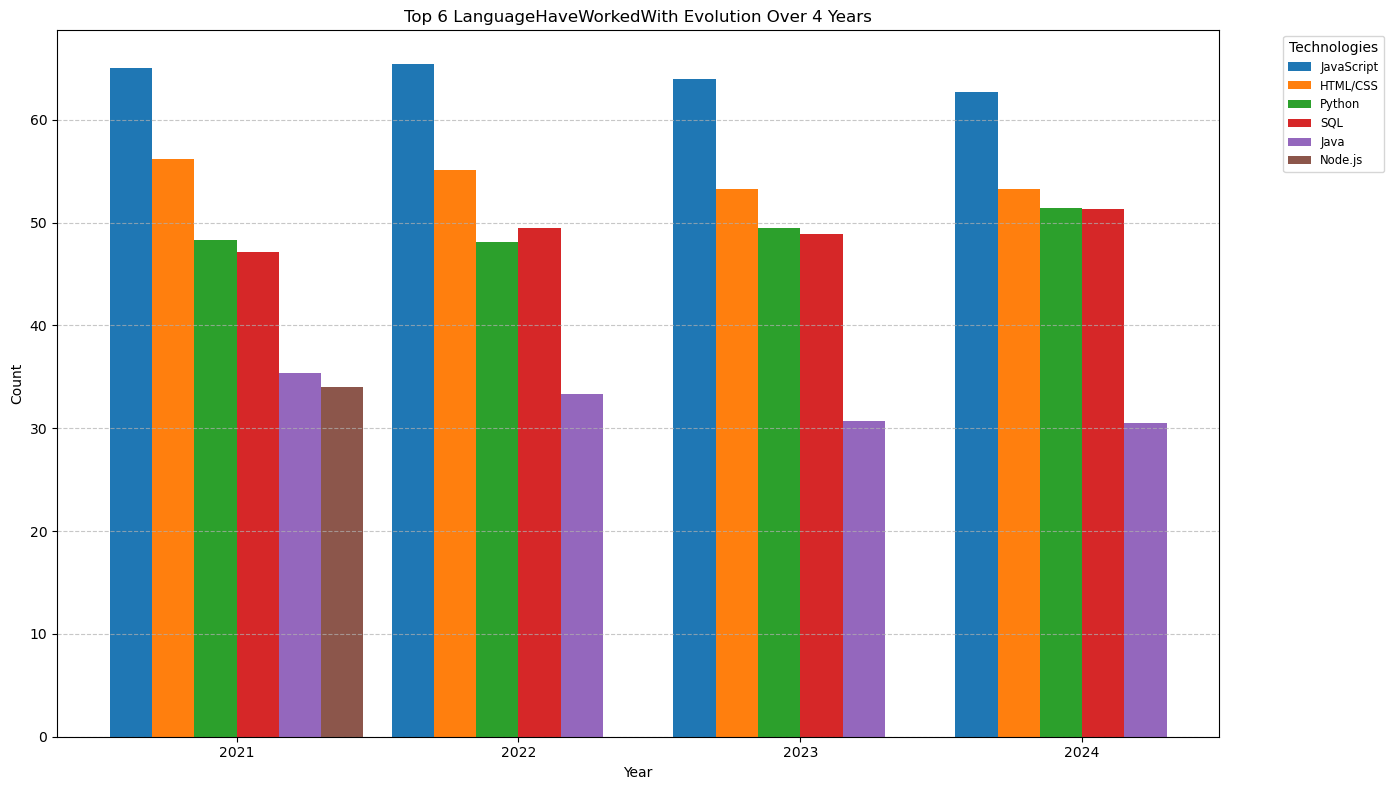

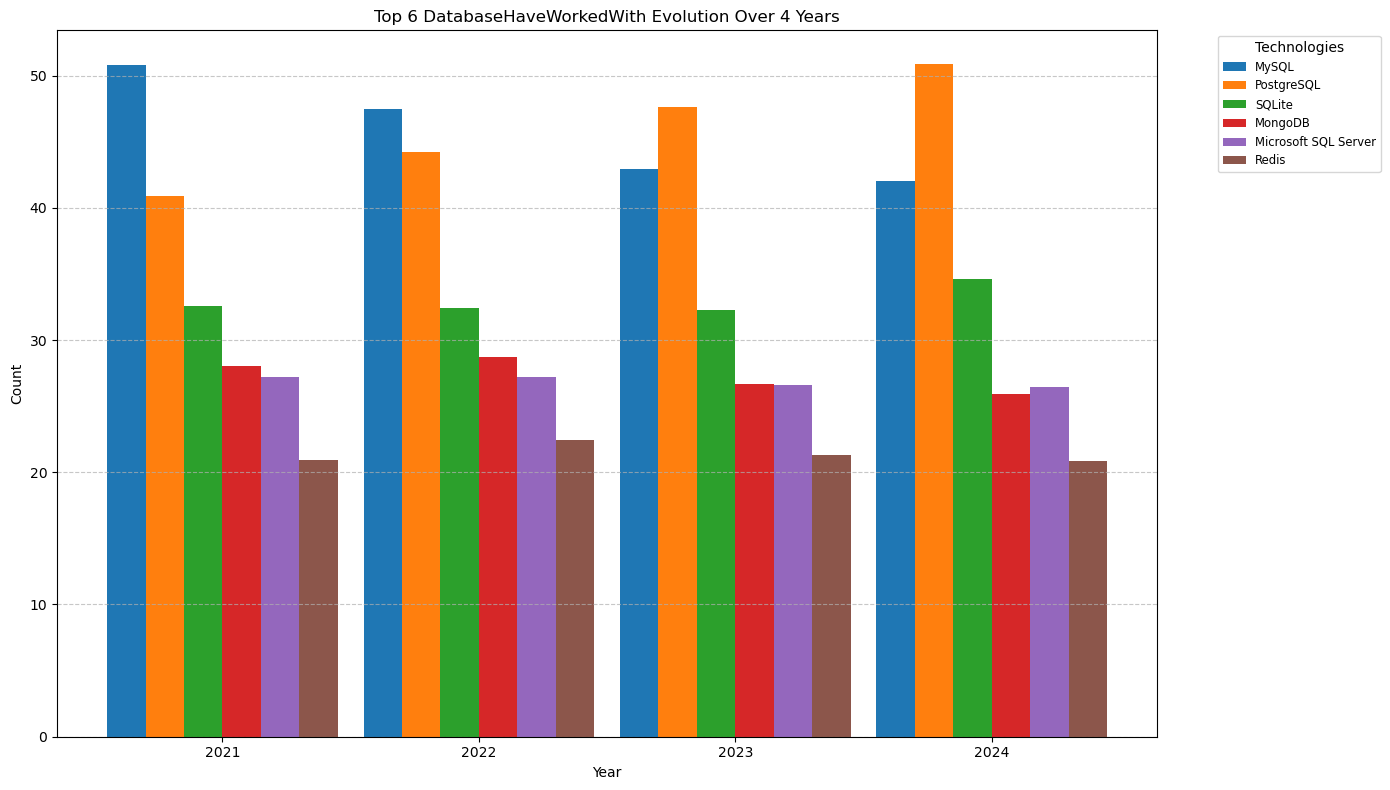

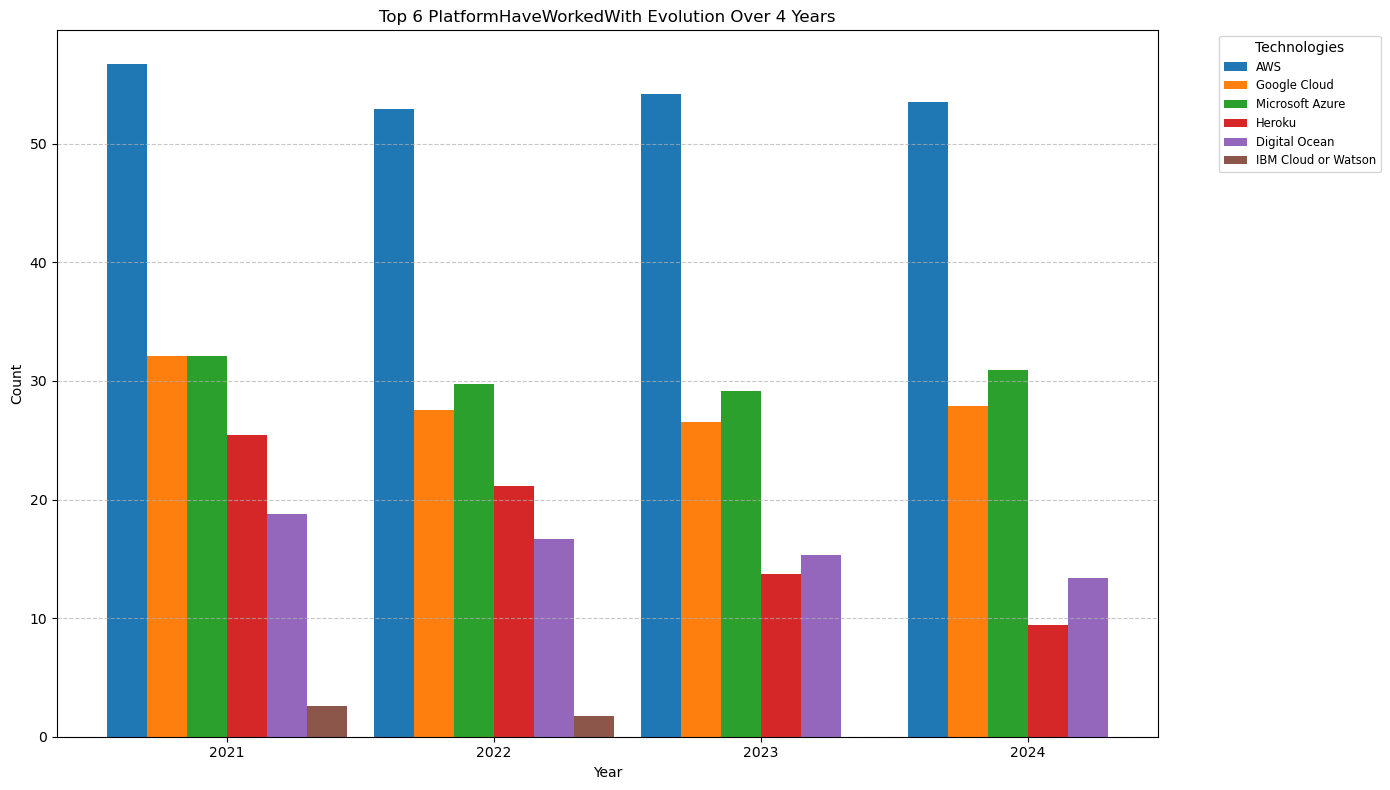

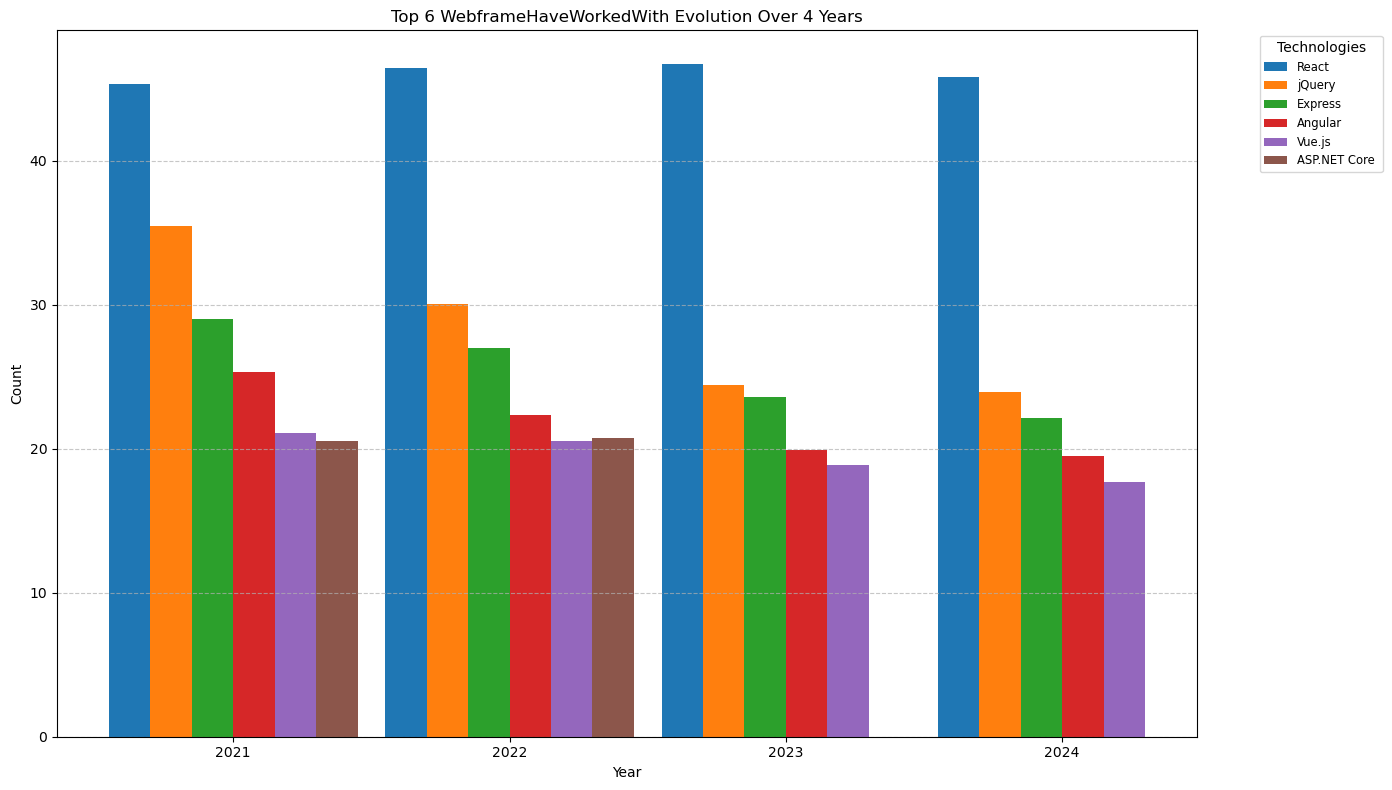

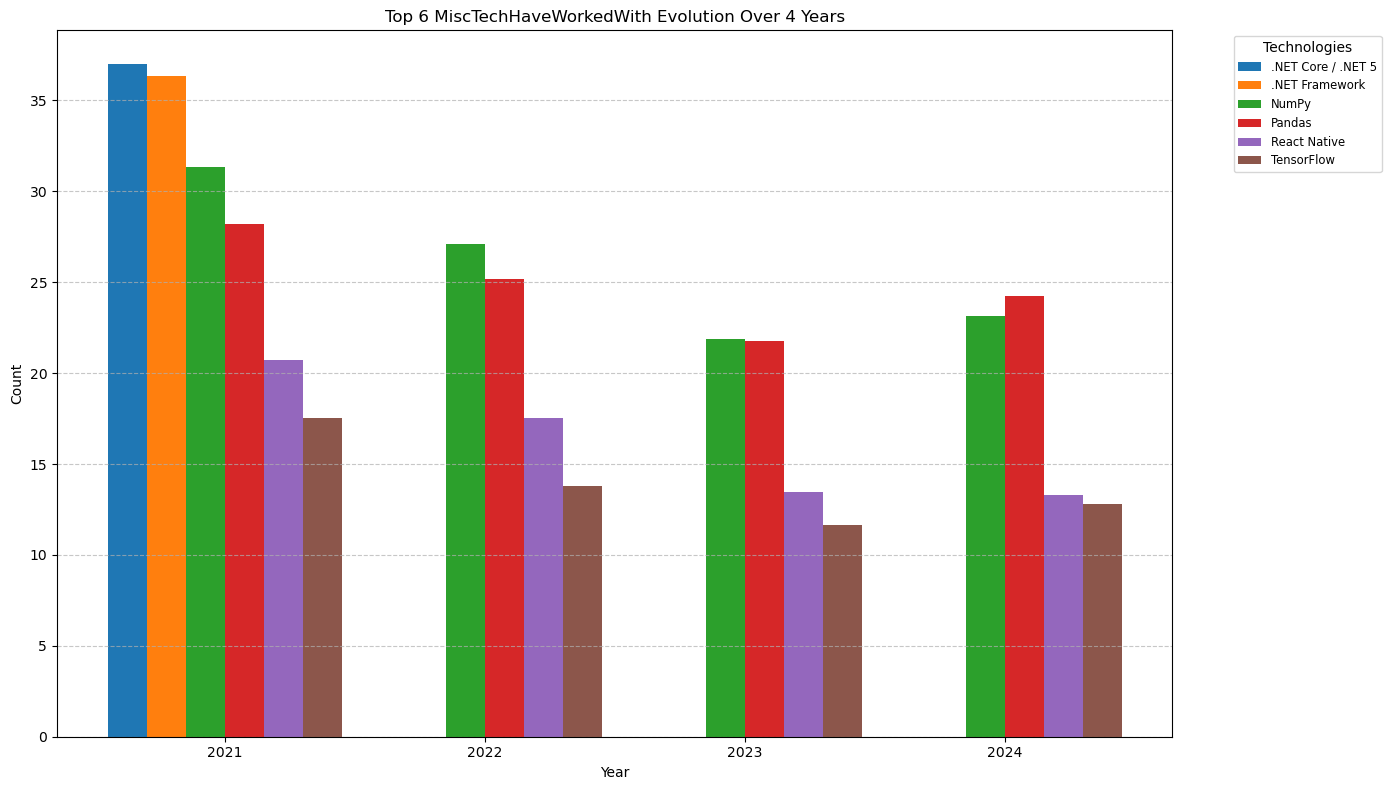

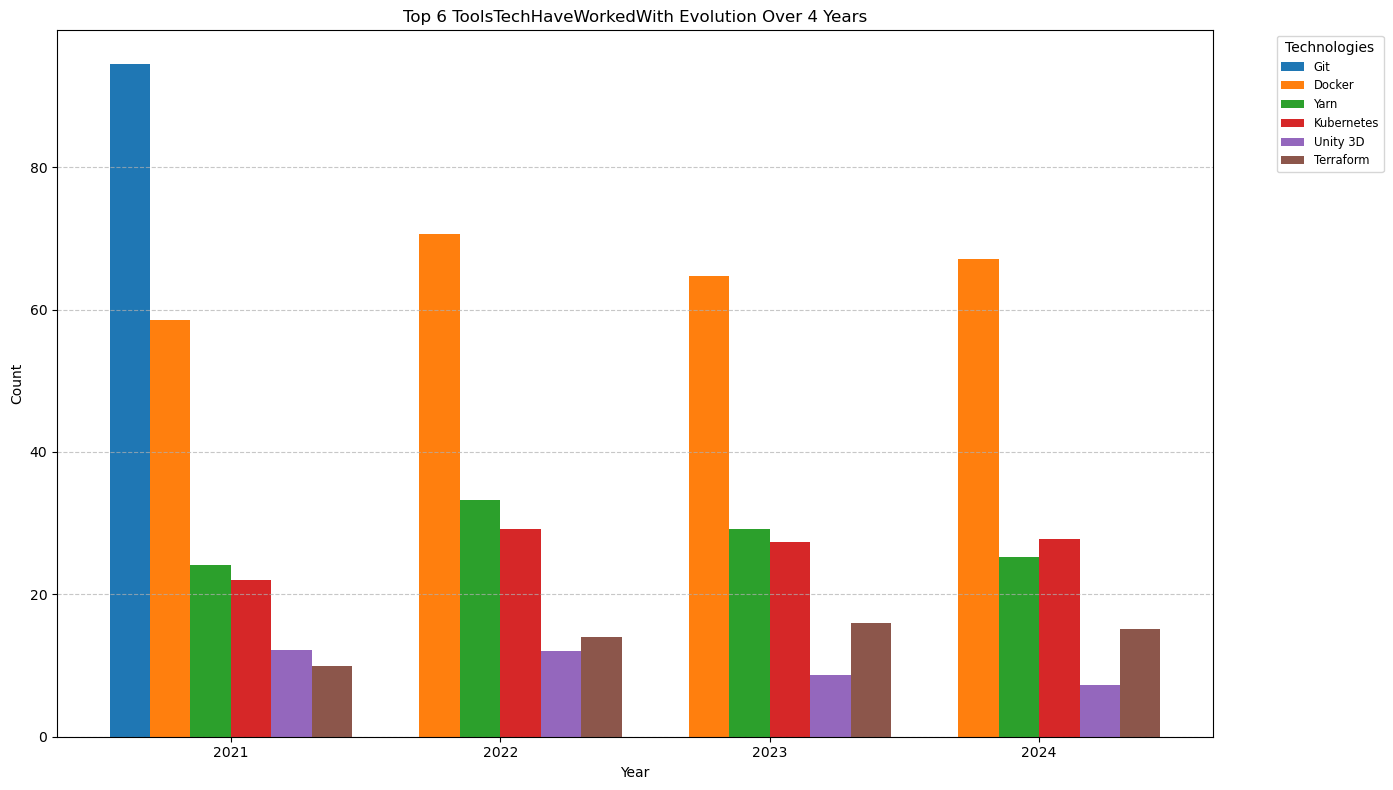

In [10]:
# Generate bar charts, directly plotting the values for each year
for col in cols_to_analyze:
    # Prepare data for plotting
    col_data = {year: results[year][col] for year in results if col in results[year]}
    years = sorted(col_data.keys())

    # Concatenate dataframes for all years
    all_data = pd.concat(
        [col_data[year]["count"].rename(year) for year in years], axis=1
    )

    # Identify top 6 technologies based on the first year's data
    top_6_techs = col_data[years[0]].sort_values(by="count", ascending=False).head(6).index

    # Extract data for the top 10 technologies
    top_6_data = all_data.loc[top_6_techs, years]

    # Prepare data for bar charts
    x = np.arange(len(years))  # Years as X-axis
    width = 0.15  # Width of each bar

    plt.figure(figsize=(14, 8))
    for i, tech in enumerate(top_6_techs):
        values = top_6_data.loc[tech].values
        plt.bar(x + i * width, values, width, label=tech)

    # Add labels and formatting
    plt.title(f"Top 6 {col} Evolution Over 4 Years")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(x + width * (len(top_6_techs) - 1) / 2, years)
    plt.legend(title="Technologies", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Analysis from the graphics and usage percentages highlights key trends in the tech industry:
- Programming Languages: JavaScript, HTML, and Python remain dominant, with TypeScript and Rust showing consistent growth.
- Databases: PostgreSQL has become the most widely used database, overtaking MySQL, with emerging platforms like Supabase and DuckDB gaining traction.
- Cloud Platforms: AWS leads the market, followed by Google Cloud, while newer platforms like Supabase are quickly gaining popularity.
- Frameworks: Node.js and React maintain their status as favorites, while Next.js and FastAPI are steadily rising.
- Tools: Docker and npm are industry staples, with Terraform and Kubernetes seeing increasing adoption.

## Question 2: How has the adoption of AI tools and practices evolved in development environments, and what do developers perceive about their effectiveness?

### Clean data

In [11]:
#Collumns of interest for Q2 

ai_data = data_2024[
    [
        'AISearchDevHaveWorkedWith',
        'AIToolCurrently Using',
        'AIToolInterested in Using',
        'AISent',
        'AIAcc',
        'AIComplex',
        'AIChallenges'
    ]
]

display(ai_data)

,AISearchDevHaveWorkedWith,AIToolCurrently Using,AIToolInterested in Using,AISent,AIAcc,AIComplex,AIChallenges
0,NaN,NaN,NaN,Very favorable,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Learning about a codebase;Project planning;Wri...,Testing code;Committing and reviewing code;Pre...,Very favorable,Somewhat trust,Bad at handling complex tasks,Don’t trust the output or answers
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
65432,NaN,Learning about a codebase;Project planning;Wri...,Debugging and getting help;Testing code;Deploy...,Favorable,Neither trust nor distrust,"Good, but not great at handling complex tasks","AI tools lack context of codebase, internal a..."
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the analysis is performed column by column, we opted to drop rows with NaN values to ensure accurate frequency counts. 
For columns containing multiple answers per row (e.g., delimited by semicolons), we split the answers so each appears as a separate row for proper analysis.

In [12]:
# Prepering data for Frequency Analysis
most_used_ai = ai_data['AISearchDevHaveWorkedWith'].dropna().str.split(';').explode().value_counts()
current_ai_tools = ai_data['AIToolCurrently Using'].dropna().str.split(';').explode().value_counts()
future_ai_tools = ai_data['AIToolInterested in Using'].dropna().str.split(';').explode().value_counts()

sentiment_counts = ai_data['AISent'].value_counts()
trust_levels = ai_data['AIAcc'].value_counts()
complexity_handling = ai_data['AIComplex'].value_counts()

ai_challenges = ai_data['AIChallenges'].dropna().str.split(';').explode().value_counts()


### Analyze and visualize data

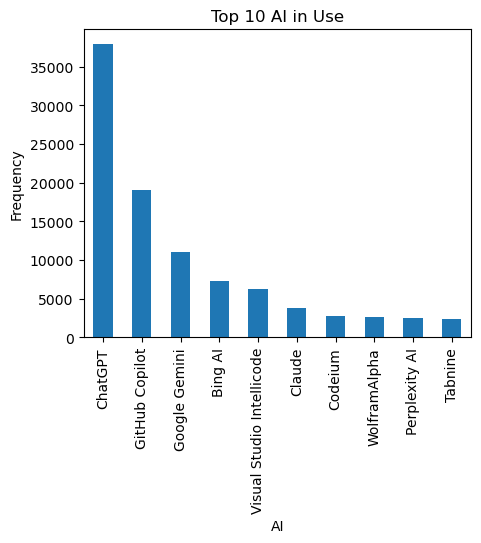

In [13]:
# Visualizations for Ai Usage Trends
plt.figure(figsize=(5, 4))
most_used_ai.head(10).plot(kind='bar', title='Top 10 AI in Use')
plt.xlabel('AI')
plt.ylabel('Frequency')
plt.show()


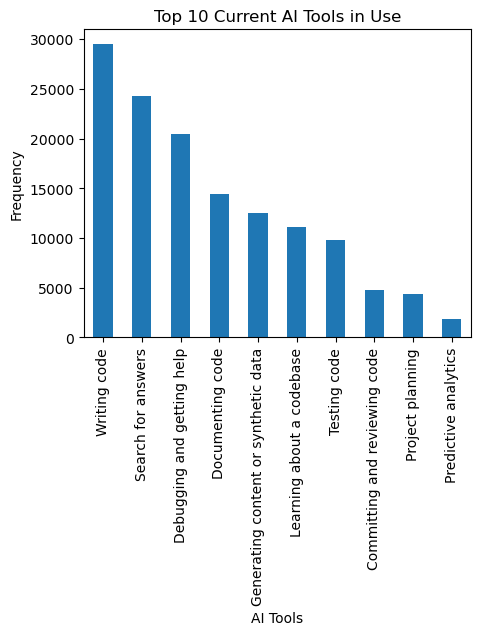

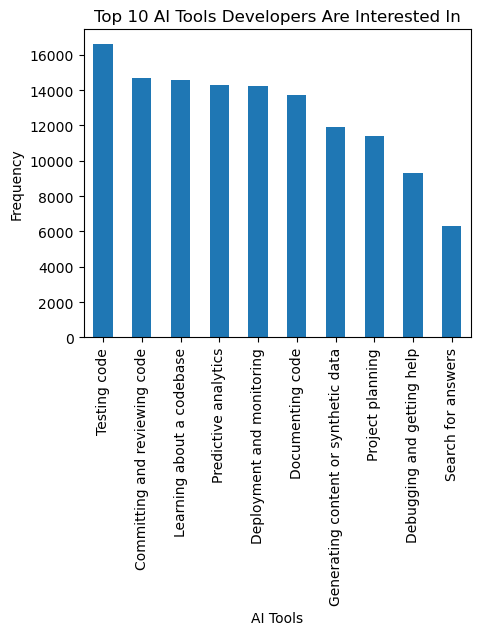

In [14]:
# Visualizations for Current and Future AI Tool Usage Trends
plt.figure(figsize=(5, 4))
current_ai_tools.head(10).plot(kind='bar', title='Top 10 Current AI Tools in Use')
plt.xlabel('AI Tools')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
future_ai_tools.head(10).plot(kind='bar', title='Top 10 AI Tools Developers Are Interested In')
plt.xlabel('AI Tools')
plt.ylabel('Frequency')
plt.show()

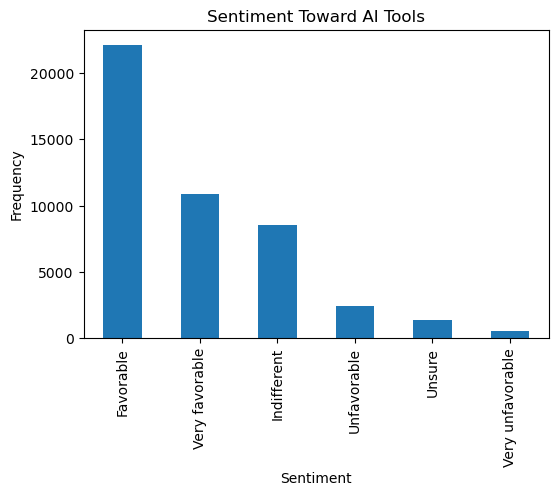

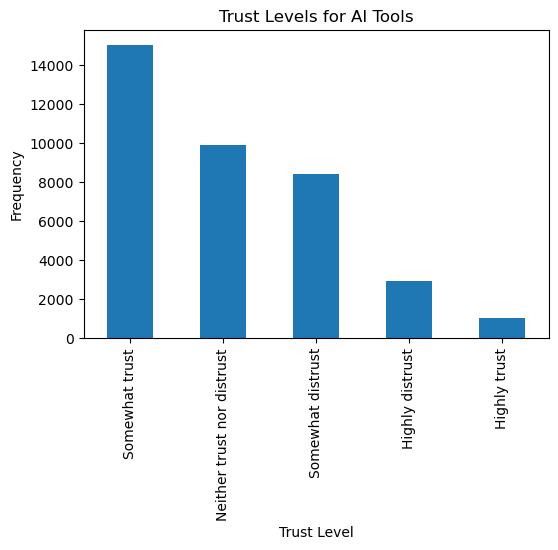

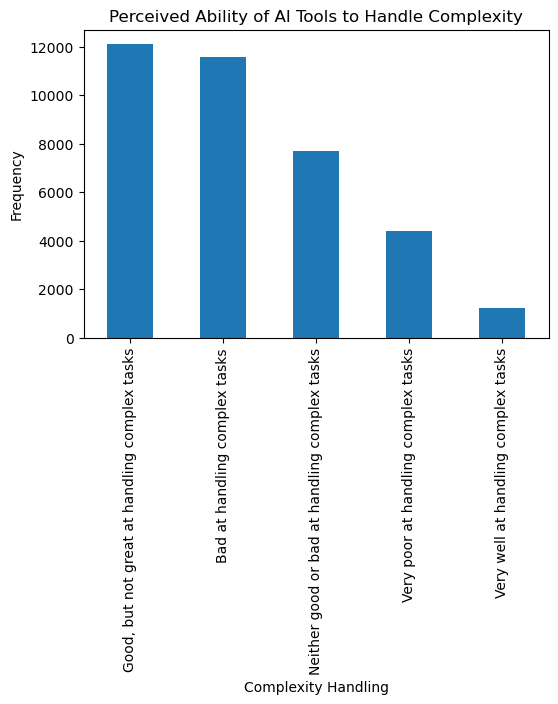

In [15]:
# Visualizations for AI Sentiment, Trust, and Complexity Handling
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', title='Sentiment Toward AI Tools')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
trust_levels.plot(kind='bar', title='Trust Levels for AI Tools')
plt.xlabel('Trust Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
complexity_handling.plot(kind='bar', title='Perceived Ability of AI Tools to Handle Complexity')
plt.xlabel('Complexity Handling')
plt.ylabel('Frequency')
plt.show()

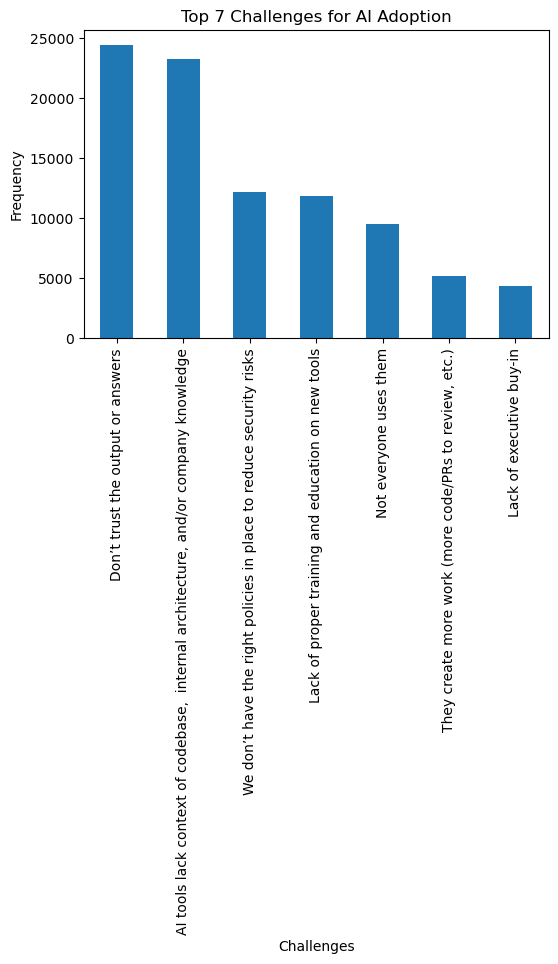

In [16]:
# Visualization for AI Challenges
plt.figure(figsize=(6, 4))
ai_challenges.head(7).plot(kind='bar', title='Top 7 Challenges for AI Adoption')
plt.xlabel('Challenges')
plt.ylabel('Frequency')
plt.show()

Insights from the analysis:

- ChatGPT and GitHub Copilot dominate the AI landscape, with significantly higher usage compared to others like Google Gemini and Bing AI.
- Writing code, searching for answers, and debugging are the most common tasks supported by AI tools.
- Developers show strong interest in using AI tools for tasks like testing code and predictive analytics.
- Most developers have favorable or very favorable opinions of AI tools, suggesting overall acceptance and satisfaction.
- Trust in AI tools is moderate, with most developers expressing "somewhat trust," indicating room for improvement in reliability.
- Developers rate AI tools as "good but not great" or "bad" at handling complex tasks, showing a need for improvement in this area.
- Major challenges include lack of trust in AI outputs, limited context for codebases, and organizational and policy barriers.





